# Лабораторная работа №3. Задача регресии

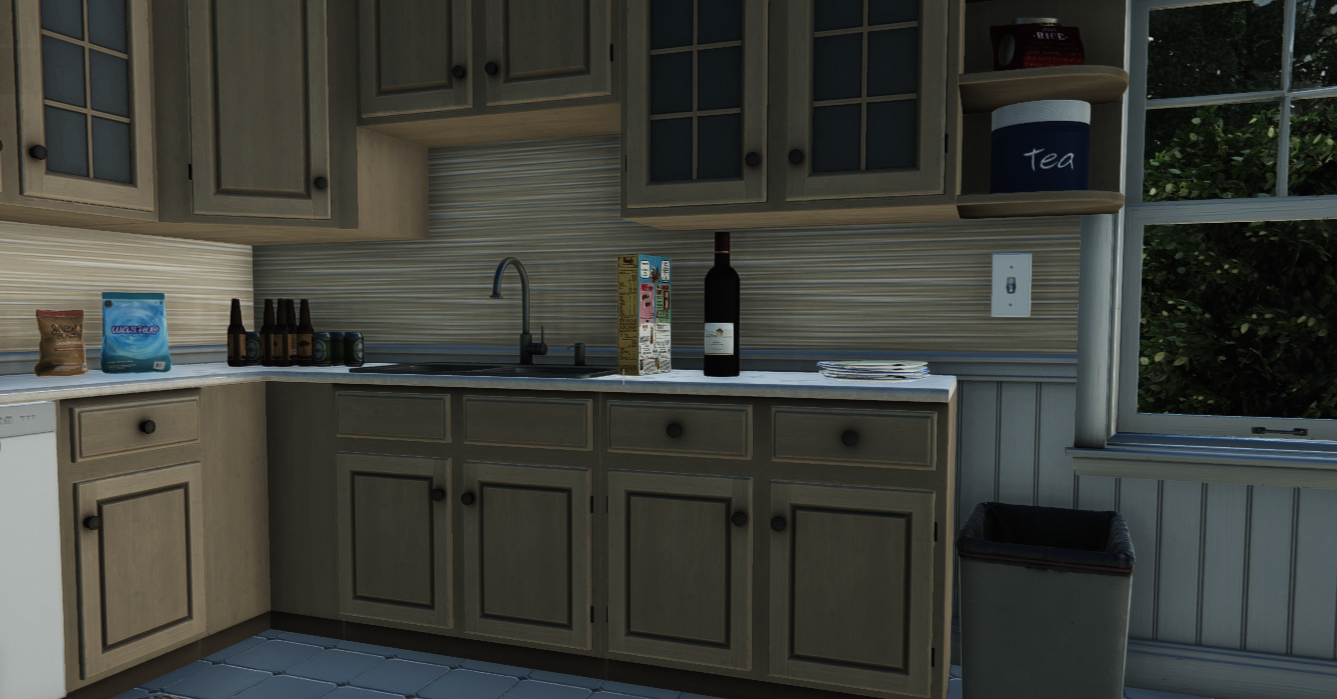

Импортируем необходимые библиотечки

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Открываем наш датасет и изучаем информацию о нем (кол-во пропущенных значений, названия столбцов)

In [10]:
path = 'energy_task.csv'
energy = pd.read_csv(path)
energy.info()
energy.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19626 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19569 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19654 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19644 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19651 non-null  float64
 15  T7           19681 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19613 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint'],
      dtype='object')

# Обзор данных.


В датасете имеются следующие столбцы, содержащие следующую информацию:
дата d в формате: дд-мм-гггг чч:мм


Приборы, потребление энергии в Втч (целевая переменная для прогнозирования)

освещение, энергопотребление светильников в доме в Втч

T1, Температура на кухне, в градусах Цельсия.

RH_1, Влажность на кухне, в %

T2, Температура в жилом помещении, по Цельсию

RH_2, Влажность в жилом помещении, в %

T3, Температура в прачечной

RH_3, Влажность в помещении прачечной, в %

T4, Температура в офисном помещении, по Цельсию

RH_4, Влажность в офисном помещении, в %

T5, Температура в ванной, по Цельсию

RH_5, Влажность в ванной, в %

T6, Температура снаружи здания (северная сторона), в градусах Цельсия.

RH_6, Влажность снаружи здания (северная сторона), в %

T7, Температура в гладильной комнате, в градусах Цельсия.

RH_7, Влажность в гладильной, в %

T8, Температура в комнате для подростков 2, по Цельсию

RH_8, Влажность в комнате подростка 2, в %

T9, Температура в комнате родителей, по Цельсию

RH_9, Влажность в комнате родителей, в %

To, Температура снаружи (по метеостанции Шьевр), в градусах Цельсия.

Давление (по метеостанции Шьевр), мм рт. ст.

RH_out, Влажность на улице (по метеостанции Шьевр), в %

Скорость ветра (по данным метеостанции Шьевр), м/с

Видимость (с метеостанции Шьевр), км

Точка росы (по метеостанции Шьевр), °C км

Точка росы (по метеостанции Шьевр), °CÂ°C

Проверим датасет на наличие пропущенных значений

In [11]:
energy.isna().sum().sort_values(ascending=False)

T_out          196
RH_2           166
Press_mm_hg    128
T8             122
date           109
RH_out         101
RH_5            91
T9              84
RH_6            84
RH_4            81
T7              54
Visibility      10
RH_9             3
RH_7             0
Windspeed        0
RH_8             0
T6               0
Appliances       0
T5               0
T4               0
RH_3             0
T3               0
T2               0
RH_1             0
T1               0
lights           0
Tdewpoint        0
dtype: int64

In [12]:
energy.duplicated().sum()

0

In [13]:
energy.describe().to_csv(r'DataSet3_described.csv', index= True)

Заполним столбцы с пропцщенными значениями (кроме даты и времени) случайными значениями в передалах от минимального до максимального значений:

In [14]:
energy['T_out'] = energy['T_out'].map(lambda x: np.random.randint(-5, 26.1) if pd.isna(x) else x)
energy['RH_2'] = energy['RH_2'].map(lambda x: np.random.randint(17.2, 29) if pd.isna(x) else x)
energy['Press_mm_hg'] = energy['Press_mm_hg'].map(lambda x: np.random.randint(729, 772) if pd.isna(x) else x)
energy['T8'] = energy['T8'].map(lambda x: np.random.randint(16, 27) if pd.isna(x) else x)
energy['RH_out'] = energy['RH_out'].map(lambda x: np.random.randint(24, 100) if pd.isna(x) else x)
energy['RH_5'] = energy['RH_5'].map(lambda x: np.random.randint(-6, 28) if pd.isna(x) else x)
energy['T9'] = energy['T9'].map(lambda x: np.random.randint(15, 25) if pd.isna(x) else x)
energy['RH_6'] = energy['RH_6'].map(lambda x: np.random.randint(1, 100) if pd.isna(x) else x)
energy['RH_4'] = energy['RH_4'].map(lambda x: np.random.randint(28, 51) if pd.isna(x) else x)
energy['T7'] = energy['T7'].map(lambda x: np.random.randint(1, 66) if pd.isna(x) else x)
energy['Visibility'] = energy['Visibility'].map(lambda x: np.random.randint(1, 66) if pd.isna(x) else x)
energy['RH_9'] = energy['RH_9'].map(lambda x: np.random.randint(29, 53) if pd.isna(x) else x)

In [15]:
energy.isna().sum().sort_values(ascending=False)

date           109
RH_6             0
Visibility       0
Windspeed        0
RH_out           0
Press_mm_hg      0
T_out            0
RH_9             0
T9               0
RH_8             0
T8               0
RH_7             0
T7               0
T6               0
Appliances       0
RH_5             0
T5               0
RH_4             0
T4               0
RH_3             0
T3               0
RH_2             0
T2               0
RH_1             0
T1               0
lights           0
Tdewpoint        0
dtype: int64

C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 500x500 with 0 Axes>

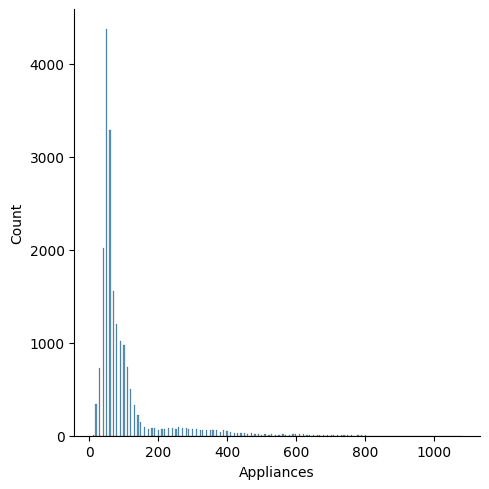

In [16]:
plt.figure(figsize=(5, 5))
sns.displot(energy['Appliances'])

Из данного графика можно предположить о наличии выбросов, поэтому будем аккуратно "чистить" уже заполненный датасет

In [19]:
path1='energy_task_preprocessed.csv'
energy_full=pd.read_csv(path1)
energy_full.head()
energy_full['lights']=energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [20]:
columns_to_include = [ 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint']
filtered_data = energy_full[columns_to_include]

correlation_matrix = filtered_data.corr()
correlation_matrix

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.071458,0.012915,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.825413,-0.006441,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,-0.030053,0.736196,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.578191,0.068534,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,-0.041023,0.679777,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.795283,0.044427,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.283228,0.828822,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.796256,-0.095192,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.167066,0.847259,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508


<function matplotlib.pyplot.show(close=None, block=None)>

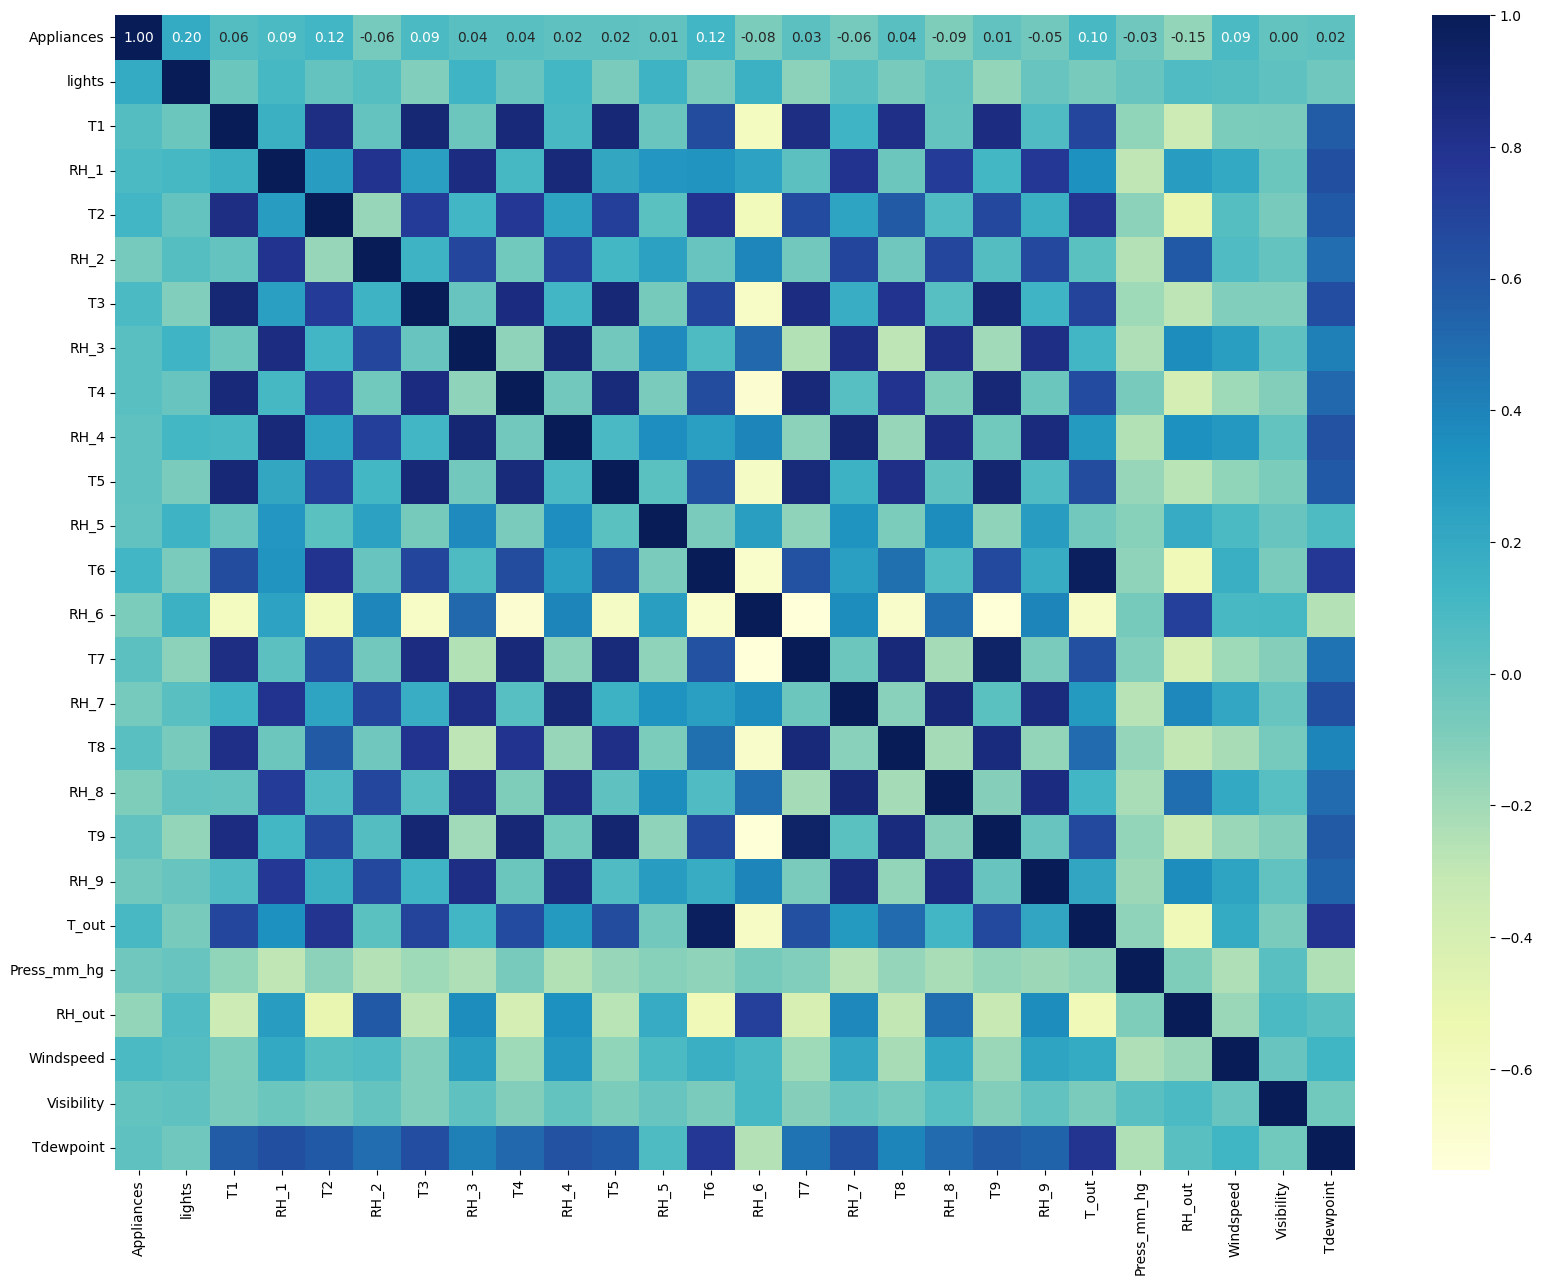

In [21]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show

Исходя из тепловой карты можно сделать следующие выводы:
1. Температура снаружи  здания на северной стороне сильно коррелирует с температурой снаружи здания
2. температуры и влажности коррелируют между собой в разной степени
3. влажность снаружи здания коррелирует с температурой в жилой комнате (гостиная) в обратном направлении (близко к -1)

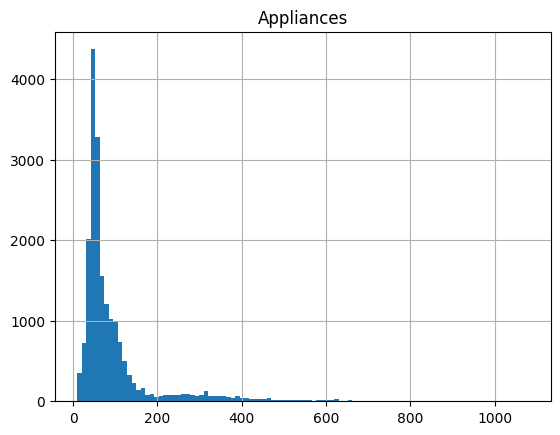

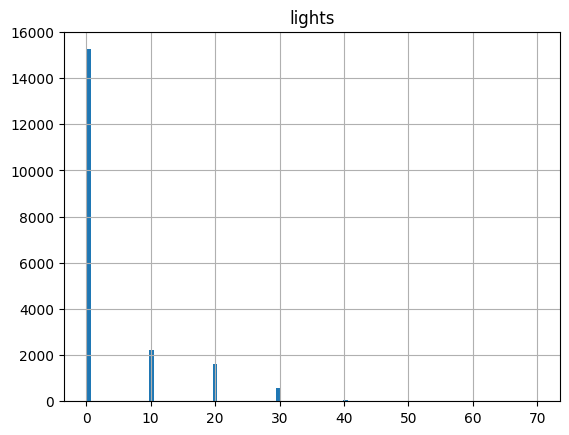

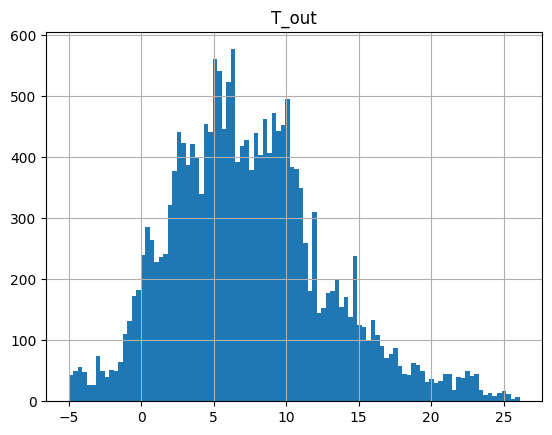

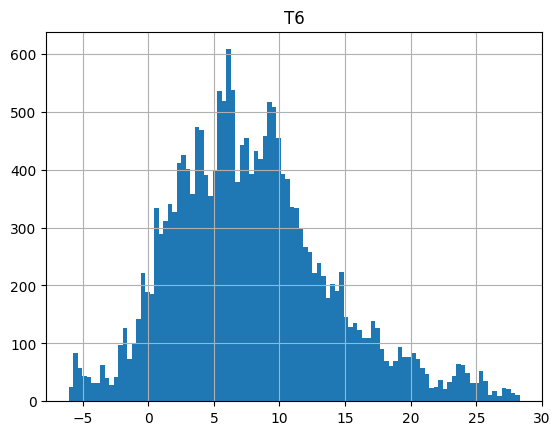

In [24]:
energy_not_filtered = energy[['Appliances', 'lights', 'T_out', 'T6']]

for col in energy_not_filtered:
    energy.hist(col, bins=100)

Выделили 4 столбца, оказывающие наибольшее влияние на кол-во включенных приборов

In [25]:
outlier=energy_full[['Appliances', 'lights', 'T_out', 'T6']]
outlier

,Appliances,lights,T_out,T6
0,60,30,6.60,7.026667
1,60,30,6.48,6.833333
2,50,30,6.37,6.560000
3,50,40,6.25,6.433333
4,60,40,6.13,6.366667
...,...,...,...,...
19730,100,0,22.70,24.796667
19731,90,0,22.60,24.196667
19732,270,10,22.50,23.626667
19733,420,10,22.30,22.433333


In [26]:
Q1 = outlier.quantile(0.25)
Q1

Appliances    50.000000
lights         0.000000
T_out          3.670000
T6             3.626667
Name: 0.25, dtype: float64

In [27]:
Q3 = outlier.quantile(0.75)
Q3

Appliances    100.000
lights          0.000
T_out          10.400
T6             11.256
Name: 0.75, dtype: float64

In [28]:
IQR = Q3-Q1
energy_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
energy_filtered

,Appliances,lights,T_out,T6
51,50,0,5.15,4.866667
52,40,0,5.17,4.726667
53,50,0,5.18,4.466667
54,40,0,5.20,4.333333
55,50,0,5.13,4.156667
...,...,...,...,...
19679,90,0,14.90,19.596667
19680,90,0,15.10,20.456667
19681,60,0,15.30,20.930000
19682,70,0,15.50,21.333333


In [29]:
index_list = list(energy_filtered.index.values)
energy_filtered = energy_full[energy_full.index.isin(index_list)]
energy_filtered.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
51,12-01-2016 01:30,50,0,20.926667,45.590000,20.29,44.290000,20.166667,45.530,21.890000,...,16.890000,46.290000,5.15,737.900000,92.0,5.500000,40.0,3.95,43.060474,43.060474
52,12-01-2016 01:40,40,0,20.890000,45.666667,20.23,44.290000,20.133333,45.500,21.823333,...,16.890000,46.433333,5.17,738.033333,92.0,5.333333,40.0,3.97,21.904855,21.904855
53,12-01-2016 01:50,50,0,20.890000,46.060000,20.20,44.400000,20.200000,45.500,21.666667,...,16.890000,46.633333,5.18,738.166667,92.0,5.166667,40.0,3.98,12.239864,12.239864
54,12-01-2016 02:00,40,0,20.790000,46.200000,20.20,44.466667,20.166667,45.500,21.533333,...,16.890000,46.826667,5.20,738.300000,92.0,5.000000,40.0,4.00,3.533952,3.533952
55,12-01-2016 02:10,50,0,20.790000,46.200000,20.10,44.530000,20.125000,45.425,21.356667,...,16.963333,46.966667,5.13,738.400000,92.0,4.833333,40.0,3.93,4.973308,4.973308


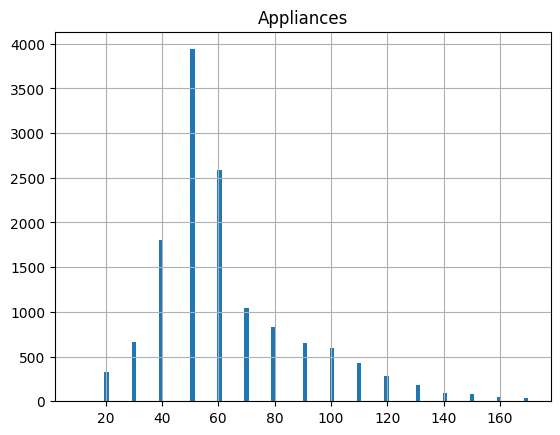

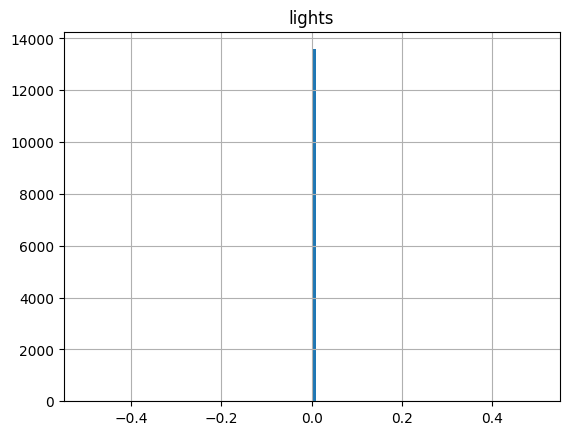

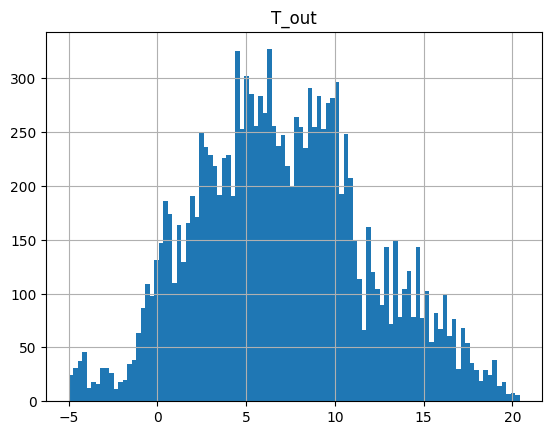

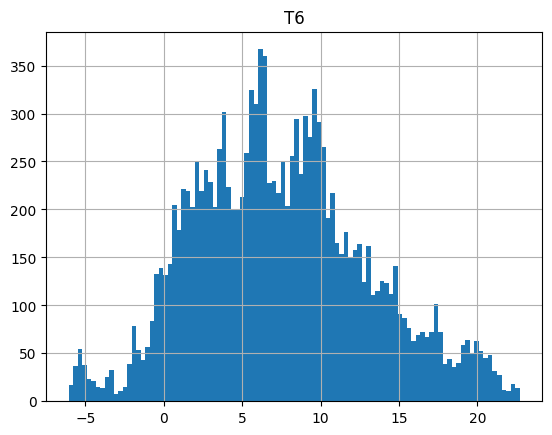

In [30]:
filtered_outlier = energy_filtered[['Appliances', 'lights', 'T_out', 'T6']]

for col in filtered_outlier:
    energy_filtered.hist(col, bins=100)

Как мы видим из графиков, число выбросов уменьшилось, поэтому теперь будем работать непосредственно над регрессией

C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


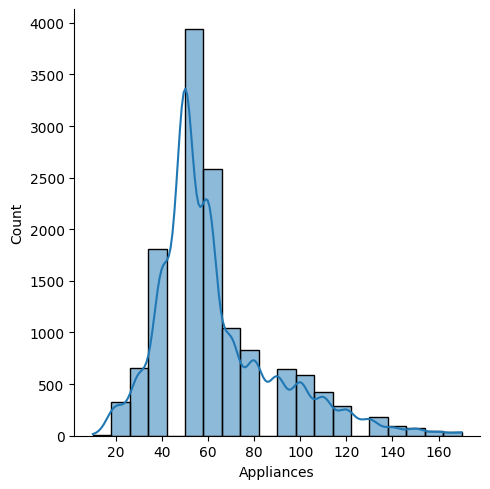

In [32]:
sns.displot(energy_filtered['Appliances'],bins=20,kde=True);

Обучаемся...

In [33]:
data_without_date=energy_filtered[['Appliances','lights', 'T6', 'T_out']]
Y = data_without_date['Appliances']
X = data_without_date.drop(['Appliances'], axis=1)
Y

51       50
52       40
53       50
54       40
55       50
         ..
19679    90
19680    90
19681    60
19682    70
19683    50
Name: Appliances, Length: 13583, dtype: int64

In [34]:
X

,lights,T6,T_out
51,0,4.866667,5.15
52,0,4.726667,5.17
53,0,4.466667,5.18
54,0,4.333333,5.20
55,0,4.156667,5.13
...,...,...,...
19679,0,19.596667,14.90
19680,0,20.456667,15.10
19681,0,20.930000,15.30
19682,0,21.333333,15.50


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10866, 3), (10866,), (2717, 3), (2717,))

In [36]:
lr = LinearRegression().fit(X_train, y_train)

In [37]:
lr.predict(X_test)

array([50.97077397, 49.37586183, 71.06944468, ..., 66.11359401,
       53.29389716, 65.3046162 ])

In [38]:
y_pred = lr.predict(X_test)

Оценки:

In [39]:
def MSE(y_test, y_pred):
    diff = y_pred-y_test
    diff_squar=diff**2
    mean_diff=diff_squar.mean()
    return mean_diff
    
def MAE(y_test, y_pred):
    diff = y_pred-y_test
    abs_diff = np.absolute(diff)
    mean_diff = abs_diff.mean()
    return mean_diff

def MAPE(y_test, y_pred):
    mean_diff = np.mean(np.abs((y_test-y_pred)/y_test))*100
    return mean_diff



print(f'MSE: {MSE(y_test, y_pred)}')
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {np.sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MSE: 639.2323626306666
MAE: 18.56881393857897
RMSE: 25.283044963585112
MAPE: 5.707101445087615
R^2: 0.07933336817488945


In [40]:
len(lr.coef_)
lr.coef_

array([ 0.        ,  1.90565948, -0.68180449])

In [41]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {np.sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 18.56882126439151
MSE: 639.2325049615713
RMSE: 25.283047778335018
MAPE: 5.70710278273596
R^2: 0.07933316318008254


array([ 0.        ,  1.90559538, -0.68173213])

In [42]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {MAE(y_test, y_pred)}')
print(f'MSE: {MSE(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(MSE(y_test, y_pred))}')
print(f'MAPE: {np.sqrt(MAPE(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 18.640282312520814
MSE: 641.0094617000324
RMSE: 25.31816465899597
MAPE: 5.719477934409252
R^2: 0.07677386726370372


array([ 0.        ,  1.35201088, -0.04731021])

In [43]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [44]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [47]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

In [48]:
from scipy import stats


for x_pearson in X:
  pearson_coef, p_value = stats.pearsonr(energy_filtered[x_pearson], Y)
  print(x_pearson)
  print('Коэффициент корреляции Пирсона = ', pearson_coef, ' P-значение = ', p_value)
  print('')

lights
Коэффициент корреляции Пирсона =  nan  P-значение =  nan

T6
Коэффициент корреляции Пирсона =  0.28425768936008544  P-значение =  8.115094400407839e-251

T_out
Коэффициент корреляции Пирсона =  0.2663568472330911  P-значение =  2.464912860206343e-219



C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


<Axes: xlabel='T_out', ylabel='Appliances'>

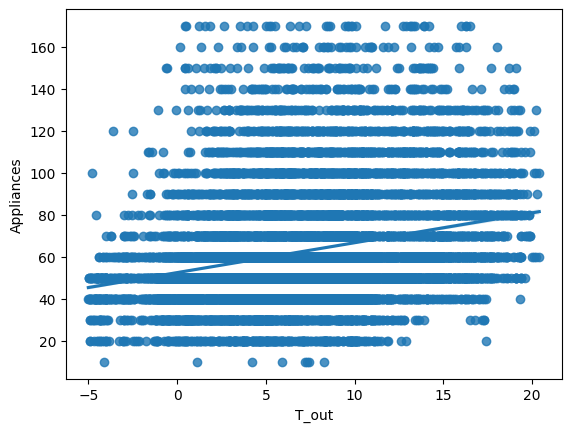

In [52]:
import seaborn as sns
X_1 = energy_filtered[['T_out']]
sns.regplot(x = X_1, y = Y)

In [53]:
lm = LinearRegression()
lm

LinearRegression()

In [54]:
lm.fit(X_1,Y)
Yhat_lm = lm.predict(X_1)
Yhat_lm[0:4]

array([59.85688129, 59.88533801, 59.89956637, 59.92802309])

In [55]:
mse_lm = MSE(Y,Yhat_lm)
r_score_lm = r2_score(Y, Yhat_lm)
print(pd.DataFrame([mse_lm, r_score_lm], index=['MSE', 'R^2'], columns=['Метрики качества']))

     Метрики качества
MSE        631.916123
R^2          0.070946


In [56]:
for x in X:
  print(x)
  loop_lm = LinearRegression().fit(energy_filtered[[x]], Y)
  print('The intercept = ', loop_lm.intercept_, ' и coefficient = ', loop_lm.coef_)
  Yhat_loop_lm = loop_lm.predict(energy_filtered[[x]])
  print('Mean Squared Error = ', MSE(Y, Yhat_loop_lm), ' и R^2= ', r2_score(Y,Yhat_loop_lm))
  print('')

lights
The intercept =  62.62828535669587  и coefficient =  [0.]
Mean Squared Error =  680.1715536159874  и R^2=  0.0

T6
The intercept =  52.62833299713475  и coefficient =  [1.33045103]
Mean Squared Error =  625.2120365732335  и R^2=  0.08080243396033437

T_out
The intercept =  52.529276134397236  и coefficient =  [1.42283595]
Mean Squared Error =  631.9161229320753  и R^2=  0.07094597006795189



In [57]:
mlrm = LinearRegression().fit(X,Y)
mlrm

LinearRegression()

In [58]:
print('intercept = ', mlrm.intercept_, ' и coefficients = ', mlrm.coef_)

intercept =  53.21152060969262  и coefficients =  [ 0.          2.02469381 -0.81733231]


C:\Users\NoteBook\AppData\Local\Temp\ipykernel_19276\480830863.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 =  sns.distplot(Y, hist=False, color='Red', label='Real appliances')
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

<Axes: xlabel='Appliances', ylabel='Density'>

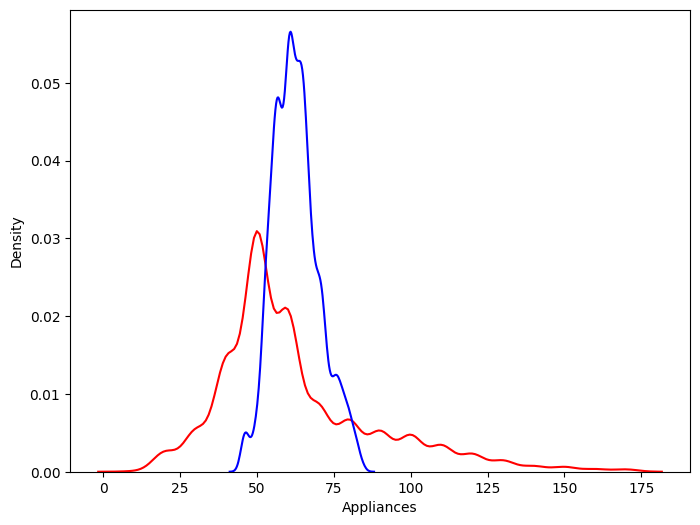

In [59]:
Yhat_mlrm = mlrm.predict(X)

plt.figure(figsize=(8,6))

ax1 =  sns.distplot(Y, hist=False, color='Red', label='Real appliances')
sns.distplot(Yhat_mlrm, hist=False, color='Blue', ax=ax1, label='Predicted appliances')

In [60]:
print('Mean Squared Error = ', MSE(Y, Yhat_mlrm), ' и R^2 = ', r2_score(Y, Yhat_mlrm))

Mean Squared Error =  624.2534020962454  и R^2 =  0.08221183497378726


In [61]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(min(independent_variable)*0.98, max(independent_variable)*1.01, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Appliances')

    plt.show()

In [62]:
pol = np.polyfit(energy_filtered['T6'], energy_filtered['T_out'], 3)
func = np.poly1d(pol)
print(func)

            3            2
-0.0003845 x + 0.003497 x + 0.9034 x + 0.4529


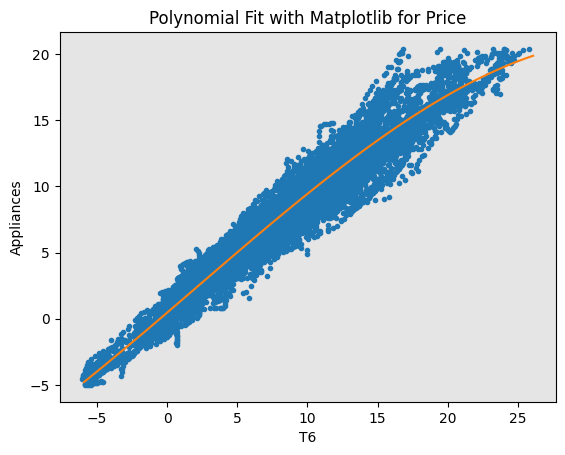

In [303]:
PlotPolly(func, energy_filtered['T6'], energy_filtered['T_out'], 'T6')

In [308]:
Input = [('standardscaler', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression()) ]

In [309]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [310]:
pipe.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [311]:
Yhat_pipe = pipe.predict(X)
Yhat_pipe[0:4]

array([61.72400566, 57.22637371, 54.7789318 , 54.65735951])

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_17804\3577989603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\NoteBook\Арина\учеба\labs\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

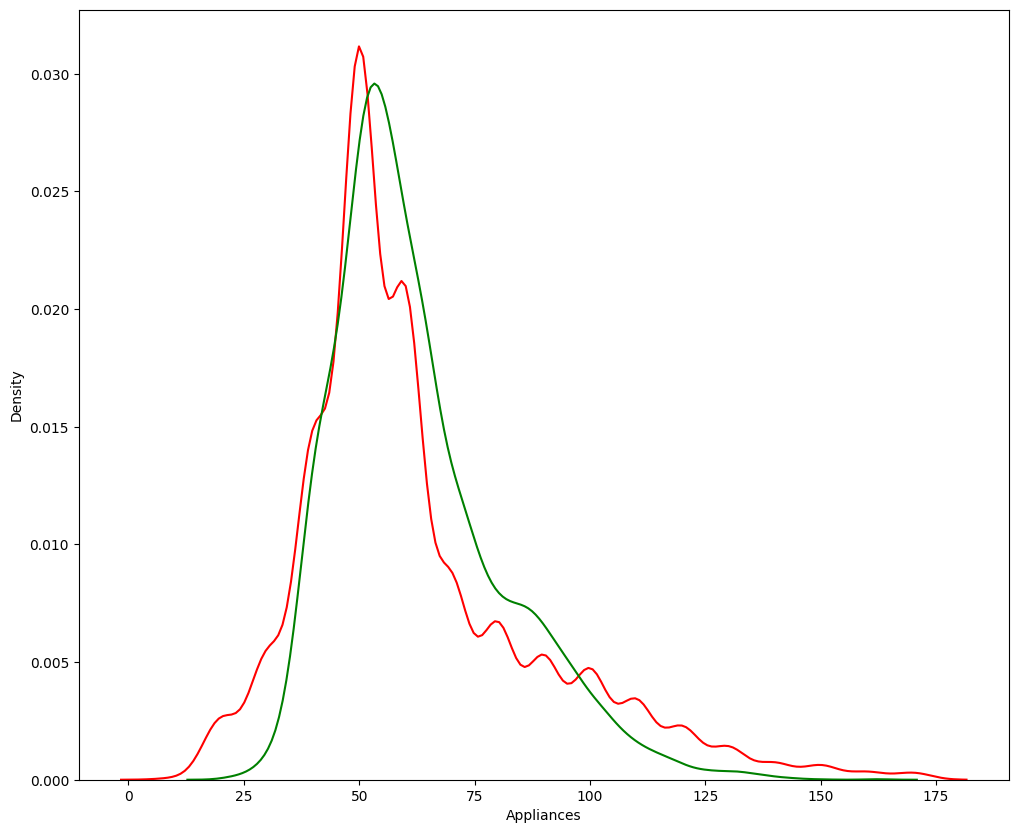

In [312]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(Y, hist=False, color='Red', label='Actual values')
sns.distplot(Yhat_pipe, hist=False, color='Green', label='Predicted values')
plt.show()

In [313]:
print("Mean Squared Error для Полиномиальной множественной линейной регрессии = ",
      MSE(Y, Yhat_pipe), ' R^2 = ', r2_score(Y, Yhat_pipe))

Mean Squared Error для Полиномиальной множественной линейной регрессии =  336.3965108770764  R^2 =  0.5005144850420716


In [315]:
Y_pred = pd.DataFrame(data=Yhat_pipe, columns=['Appliances'])
prediction_df = pd.concat([Y_pred,Y], axis=1)
prediction_df

,Appliances,Appliances
0,61.724006,NaN
1,57.226374,NaN
2,54.778932,NaN
3,54.657360,NaN
4,52.043421,NaN
...,...,...
19680,NaN,90.0
19681,NaN,60.0
19682,NaN,70.0
19683,NaN,50.0


In [316]:
base_elastic_model = ElasticNet(max_iter=100000)

In [317]:
param_grid = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}

In [318]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [319]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.75; total time=   0.0s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.0s
[CV] END ...........................alpha=0.1, l

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=100000),
             param_grid={'alpha': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.75, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [320]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [321]:
y_pred = grid_model.predict(X_test)

In [322]:
MSE(y_test,y_pred)

459.0787498711534

In [323]:
np.sqrt(MSE(y_test,y_pred))

21.42612307140873

In [326]:
np.mean(energy_filtered['Appliances'])

62.516424300583154

In [327]:
R2= round(r2_score(y_test, y_pred),2)
R2

0.31